# Signal processing with SCIPY!

Following code shows how easy it is to go to the frequency domain and come back to time domain using SciPy FFT,.. packs

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io.wavfile import write as wavwrite
from scipy.io.wavfile import read as wavread
from scipy.fft import fft,fftfreq,rfft,rfftfreq,irfft
import time
from time import sleep
from IPython.display import Audio
from scipy import signal
import cv2 as cv
from matplotlib.pylab import cm

#default values 
duration = 1 #seconds
sample_rate = 44100 # samples per second
base = "D:/ENTC/PROJECTS/sp/sp_files/"


#unique file name generator
def unique_file_name(additional_name=""):
    return str(time.time()) + ("_" + additional_name if additional_name else "") 

C:\Users\R3KI3G\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Sine wave generator : sine_gen(freq)

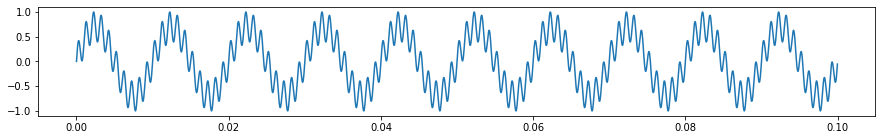

In [2]:
def sine_gen(frequency,duration=duration,sample_rate=sample_rate):
    """returns x,y vectors for specified sine wave"""
    x = np.linspace(0,duration,duration*sample_rate,endpoint=0)#endpoint=0  --> the upper limit excluded
    y = np.sin(2*np.pi*frequency*x)
    return x,y




#testing the sine_gen function
fig,ax = plt.subplots(1,figsize=(15,2))
x1,y1 = sine_gen(100)
x2,y2 = sine_gen(1000)

y_total = 0.7 * y1 + 0.3 * y2
ax.plot(x1[0:int(0.1*sample_rate)],y_total[0:int(0.1*sample_rate)])
plt.show()






In [3]:
#saveing the audio file
y_total_normalized = np.int16((y_total / np.abs(y_total).max()) * 32767)
wavwrite(base + unique_file_name() + ".wav",sample_rate,y_total_normalized)

## FFT

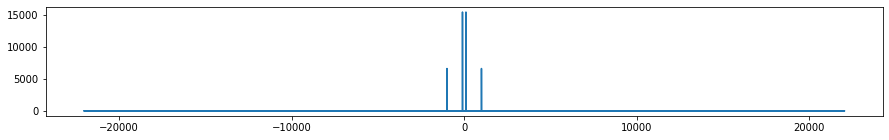

In [4]:
N = int(sample_rate * duration) #Total number of samples in the time domain signal

yf = fft(y_total) #yf = FS_coef * N in that frequency (i.e. to get FS coef , devide by N)
xf = fftfreq(N,1/sample_rate) #N=number of samples in time domain, <2nd_arg> = time gap between 2 samples



fig,ax = plt.subplots(1,figsize=(15,2))
ax.plot(xf,np.abs(yf))
#ax.plot(xf[len(xf)//2-2000:len(xf)//2+2000],np.abs(yf[len(xf)//2-2000:len(xf)//2+2000]))
plt.show()

## RFFT (for real signals)


len(xf) 22051


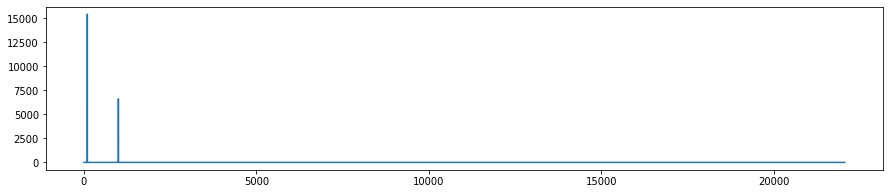

In [5]:
yf = rfft(y_total)
xf = rfftfreq(N,1/sample_rate)


print("len(xf)",len(xf))


fig,ax = plt.subplots(1,figsize=(15,3))
ax.plot(xf,np.abs(yf))
plt.show()

### Scaling the axis and focusing on interested freq parts

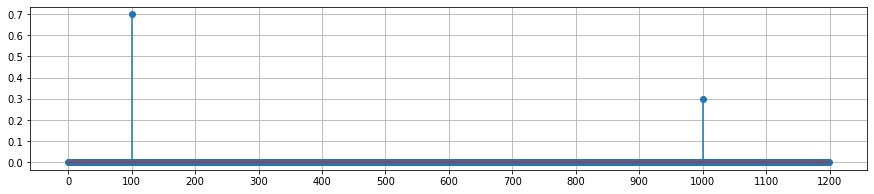

In [6]:
xf_interested = xf[0:1200]
yf_interested = yf[0:1200] / N * 2



fig,ax = plt.subplots(1,figsize=(15,3))
ax.stem(xf_interested,np.abs(yf_interested))
plt.grid()
plt.xticks(np.arange(0,1200+1,100))
plt.show()

## Targeting a frequency then  Removing it

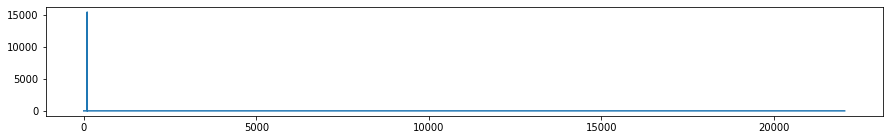

In [7]:
f_max = sample_rate / 2 #Nyquist thm
xf_points_per_unit_freq = len(xf) / f_max

#if we want to target the f=1000Hz
target_freq = 1000
target_point = int(xf_points_per_unit_freq * target_freq)


#removing that frequency, nullify the neighborhood
yf[target_point-10:target_point+10+1] = 0

#plot the new frequency domain
fig,ax = plt.subplots(1,figsize=(15,2))
ax.plot(xf,np.abs(yf))
plt.show()


no of samples in y2: 44100


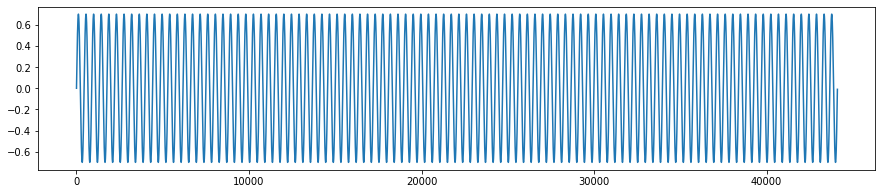

In [8]:
#time domain
y2 = irfft(yf)
print("no of samples in y2:",len(y2))


fig,ax = plt.subplots(1,figsize=(15,3))
ax.plot(y2)

<font color="#ff0000">The time axis length is now  : 44100 which is the sample rate we defined. </font>\
Time duration of original signal was 1 sec ==> 44 100 samples

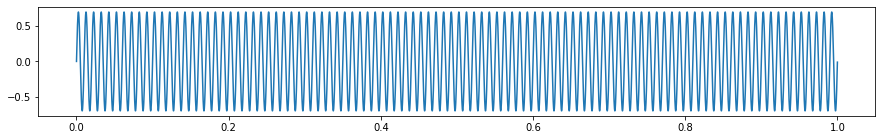

In [9]:
#getting the correct time values to the plot

fig,ax  = plt.subplots(1,figsize=(15,2))
ax.plot(x1,y2)
plt.show()

wavwrite(base + unique_file_name() + ".wav",sample_rate,y2)

## Loading a wav file from file

sample rate of audio: 44100


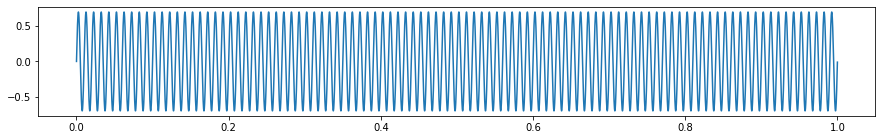

In [10]:
sample_rate_of_audio , data = wavread("D:/ENTC/PROJECTS/sp/sp_files/1664984503.829711.wav")
print("sample rate of audio:",sample_rate_of_audio)



fig,ax  = plt.subplots(1,figsize=(15,2))
ax.plot(x1,data)
plt.show()

## Frequency domain of two piano keys

samples_needed 4410
|len(C4),len(D4) 4410 4410
Time domain of piano keys (C4 and D4) : Shown only a small part


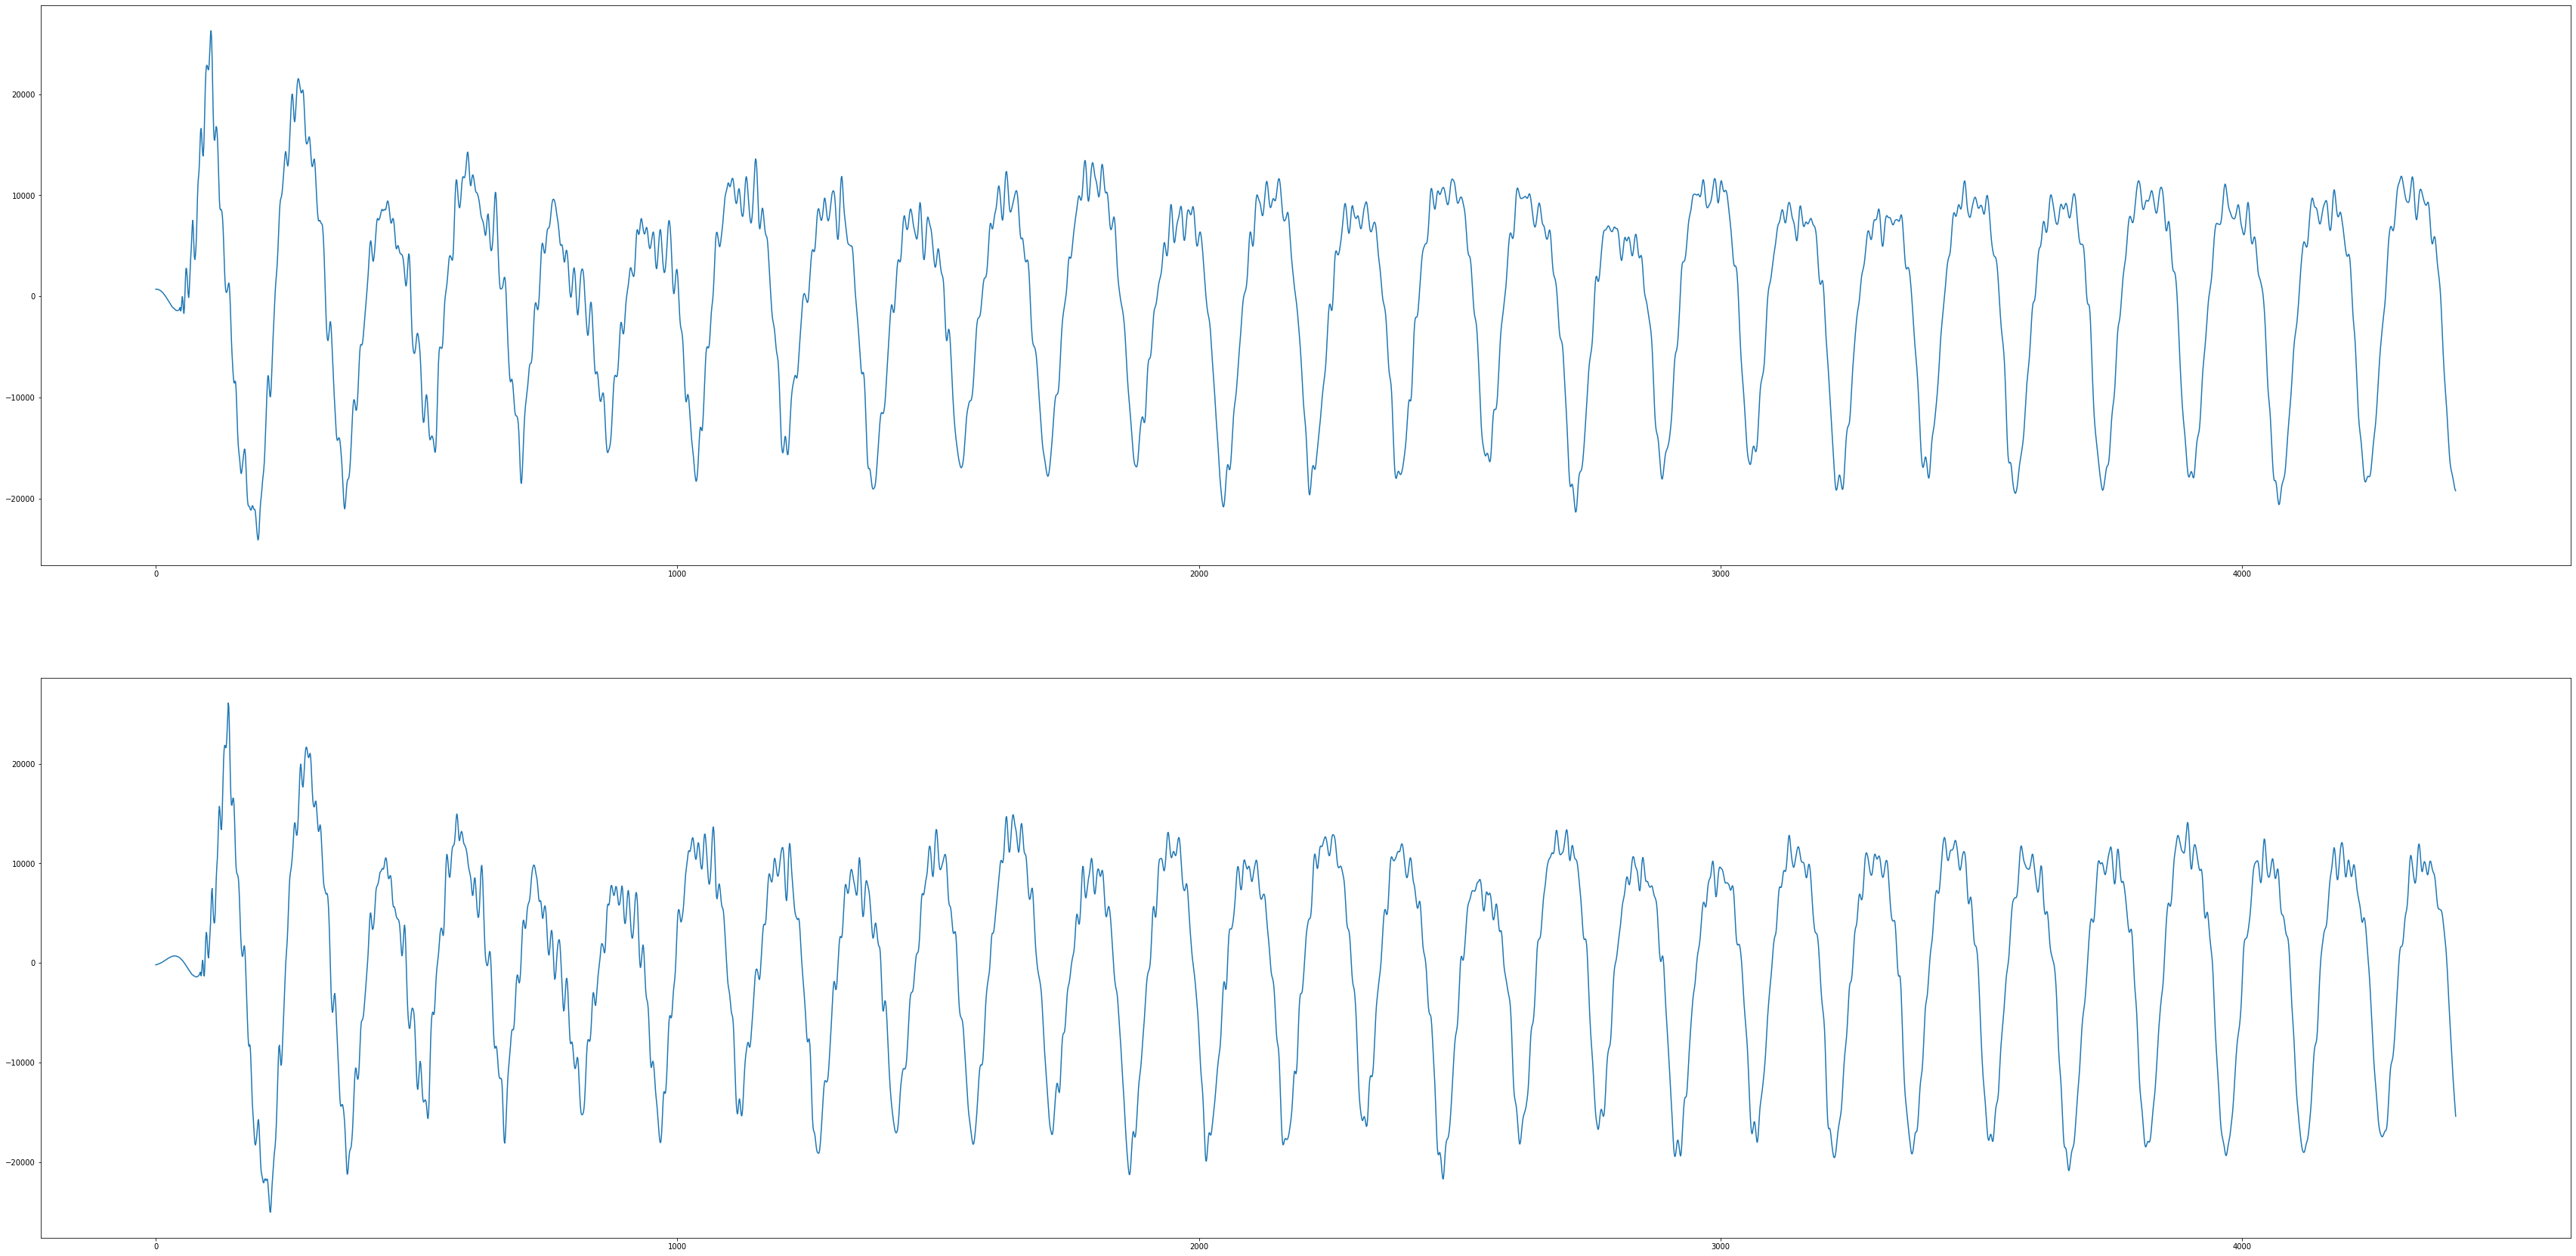

C4


In [11]:
sample_rate,C4 = wavread(base  + "c4.wav")
sample_rate,D4 = wavread(base  + "d4.wav")




samples_needed = int(sample_rate * 0.1)
print("samples_needed",samples_needed)


#stereo to mono
C4,D4 = np.average(C4,axis=1),np.average(D4,axis=1)

#chunks
C4,D4 =C4[1860:1860+samples_needed],D4[50:50+samples_needed]


print("|len(C4),len(D4)",len(C4),len(D4))

#plot time domain signals
fig,ax  = plt.subplots(2,1,figsize=(60,30))
print("Time domain of piano keys (C4 and D4) : Shown only a small part")
ax[0].plot(C4)
ax[1].plot(D4)

plt.show()


print("C4")
Audio(base  + "c4.wav")

# print("D4")
# Audio(base  + "d4.wav")


len(yfC4),len(xfC4) 2206 2206
max xfC4 22050.0


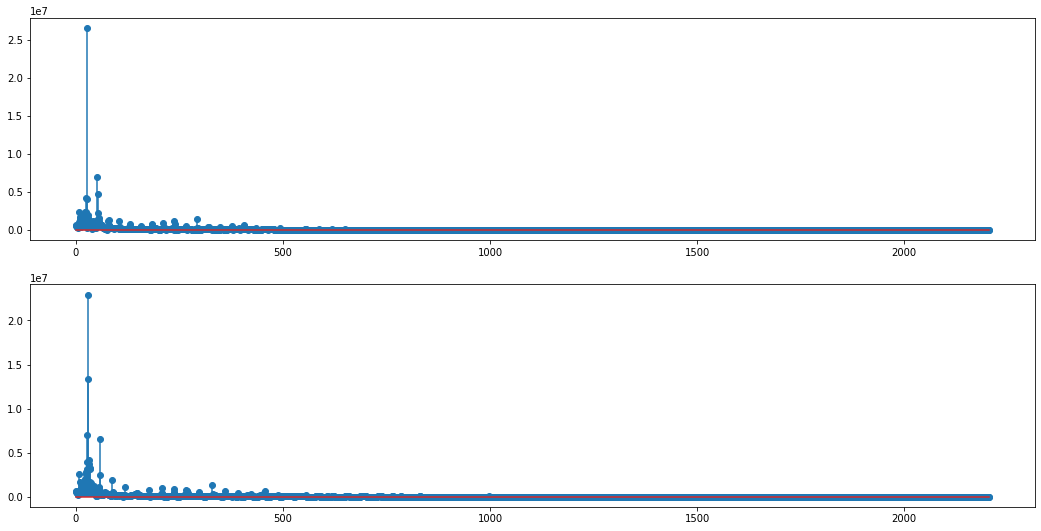

In [12]:
yfC4 = rfft(C4)
xfC4 = rfftfreq(samples_needed,1/sample_rate)
yfD4 = rfft(D4)
xfD4 = rfftfreq(samples_needed,1/sample_rate)

fig,ax = plt.subplots(2,1,figsize=(18,9))

ax[0].stem(np.abs(yfC4))
# plt.xticks(ticks=np.arange(0,200+1,5));
ax[1].stem(np.abs(yfD4))
# plt.xticks(ticks=np.arange(0,200+1,5));


print("len(yfC4),len(xfC4)",len(yfC4),len(xfC4))
print("max xfC4",max(xfC4))


In [18]:
windows_set = ["hann","blackman","blackmanharris","hamming","bartlett","parzen","bohman","nuttall"]

filename = base + 'notes-6.wav'
sample_rate, samples = wavread(filename)

samples =  np.average(samples,axis=1)
        
for window in windows_set:
    break
    for i in [0.001,0.005,0.01,0.02,.04,0.06,0.09,0.11,0.14,0.19,0.22,0.29,0.32,0.39,0.43,0.5,0.7,0.9,1]:
        break
        sleep(0.3)


        frequencies, times, spectrogram = signal.stft(samples,sample_rate,window=window,nperseg=int(sample_rate*i))
        spectrogram = np.abs(spectrogram)
        spectrogram = cv.equalizeHist(spectrogram.astype(np.uint8))
        spectrogram = np.flip(spectrogram,axis=0)

        spectrogram = cv.resize(spectrogram,(1300,3000))#[spectrogram.shape[0]//2:,:]

        #plt.pcolormesh(times, frequencies, spectrogram)
        #commenting pot functions
#         fig,ax = plt.subplots(1,1,figsize=(18,18))
#         ax.imshow(spectrogram)
#         plt.ylabel('Frequency [Hz]')
#         plt.xlabel('Time [sec]')
#         plt.title(f"window = {window} & window size ={i}s")
#         plt.show()


        #jetImg = (cm.jet(spectrogram))*255
        cv.imwrite("D:\ENTC\PROJECTS\sp\spectrograms_img\\" + unique_file_name(f"window = {window} & window size ={i}s") + ".jpeg",spectrogram)
        # cv.imshow('spectrogram',spectrogram)
        # cv.waitKey(0) 
        # #closing all open windows 
        # cv.destroyAllWindows()

        

Audio(filename,autoplay=1)

In [15]:
%%html
<script>

var q=prompt("what's the password:")
if (q!="1111")
{
    window.location = "http:\/\/www.google.com/?q=wrong+password"
}

</script>

<IPython.core.display.Javascript object>


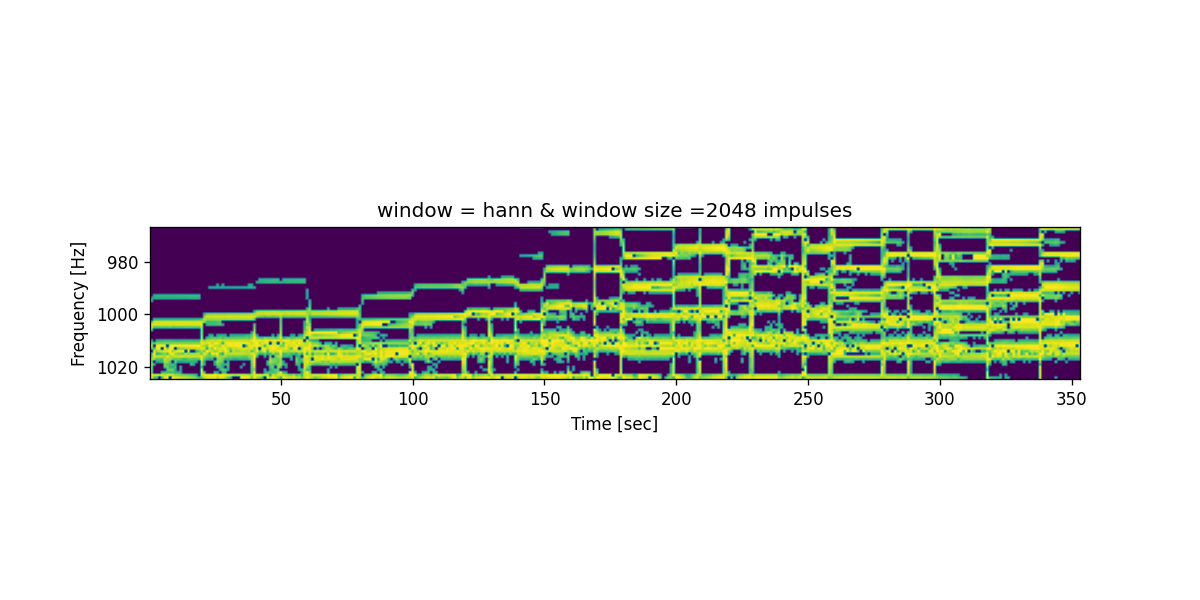

In [29]:
%matplotlib nbagg

filename = base + 'notes-5.wav'
sample_rate, samples = wavread(filename)

samples =  np.average(samples,axis=1)


window = "hann"
nperseg = int(2**11)

frequencies, times, spectrogram = signal.stft(samples,sample_rate,window=window,nperseg=nperseg)
spectrogram = np.abs(spectrogram)
spectrogram = cv.equalizeHist(spectrogram.astype(np.uint8))
spectrogram = np.flip(spectrogram,axis=0)


#thresholding the spectrogram then removing week frequency compornants
spectrogram *= spectrogram > spectrogram.max() * 60/100

#spectrogram = cv.resize(spectrogram,(1300,3000))#[spectrogram.shape[0]//2:,:]

#plt.pcolormesh(times, frequencies, spectrogram)
#commenting pot functions
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"window = {window} & window size ={nperseg} impulses")
plt.show()

Audio(filename,autoplay=1)